In [11]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [12]:
df_paralelo = pd.read_csv('Codigos/resultados_paralelo.csv', encoding='utf-8-sig')
df_sequencia = pd.read_csv('Codigos/resultado_sequêncial.csv', encoding='utf-8-sig')
df_openmp = pd.read_csv('Codigos/resultado_OpenMP.csv', encoding='utf-8-sig')
df_paralelo_cuda = pd.read_csv('Codigos/resultados_paralelo_cuda.csv', encoding='utf-8-sig')

In [13]:
print(df_sequencia)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      0
1                 20                      0
2                 40                      0
3                 80                      2
4                160                     17
5                320                    129
6                640                    998
7               1280                   9852
8               2560                 171258
9               5120                1538851


In [14]:
print(df_paralelo)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      4
1                 20                      4
2                 40                      2
3                 80                      2
4                160                      7
5                320                     49
6                640                    224
7               1280                    917
8               2560                   8462
9               5120                 170833


In [15]:
print(df_openmp)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                     86
1                 20                     29
2                 40                     17
3                 80                     29
4                160                     29
5                320                     45
6                640                    153
7               1280                    736
8               2560                   7854
9               5120                 165129


In [16]:
print(df_paralelo_cuda)

   Tamanho da matriz   Tempo (milisegundos)
0                 10                      9
1                 20                      0
2                 40                      0
3                 80                      0
4                160                      0
5                320                      0
6                640                      1
7               1280                      7
8               2560                     46
9               5120                    365


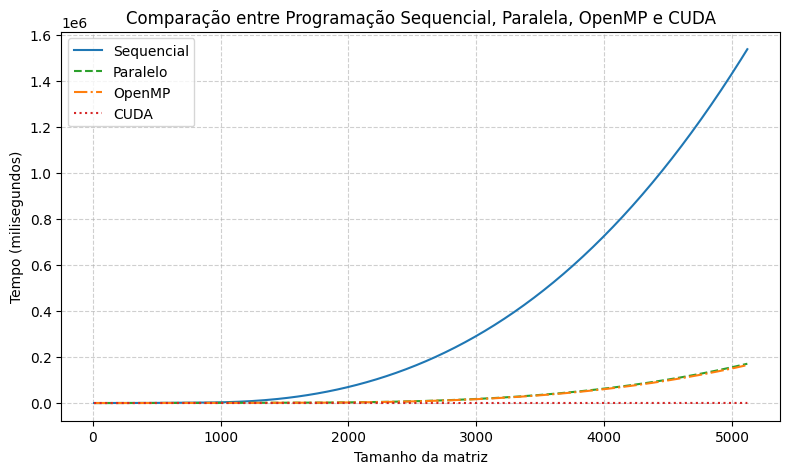

In [17]:
x1 = df_sequencia['Tamanho da matriz']
y1 = df_sequencia[' Tempo (milisegundos)']

x2 = df_paralelo['Tamanho da matriz']
y2 = df_paralelo[' Tempo (milisegundos)']

x3 = df_openmp['Tamanho da matriz']
y3 = df_openmp[' Tempo (milisegundos)']

x4 = df_paralelo_cuda['Tamanho da matriz']
y4 = df_paralelo_cuda[' Tempo (milisegundos)']

x_new = np.linspace(min(x1.min(), x2.min(), x3.min(), x4.min()), max(x1.max(), x2.max(), x3.max(), x4.max()), 200)
y1_smooth = make_interp_spline(x1, y1)(x_new)
y2_smooth = make_interp_spline(x2, y2)(x_new)
y3_smooth = make_interp_spline(x3, y3)(x_new)
y4_smooth = make_interp_spline(x4, y4)(x_new)

plt.figure(figsize=(8,5))
plt.plot(x_new, y1_smooth, label='Sequencial', color='tab:blue')
plt.plot(x_new, y2_smooth, label='Paralelo', color='tab:green', linestyle='--')
plt.plot(x_new, y3_smooth, label='OpenMP', color='tab:orange', linestyle='-.')
plt.plot(x_new, y4_smooth, label='CUDA', color='tab:red', linestyle=':')

plt.title('Comparação entre Programação Sequencial, Paralela, OpenMP e CUDA')
plt.xlabel('Tamanho da matriz')
plt.ylabel('Tempo (milisegundos)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


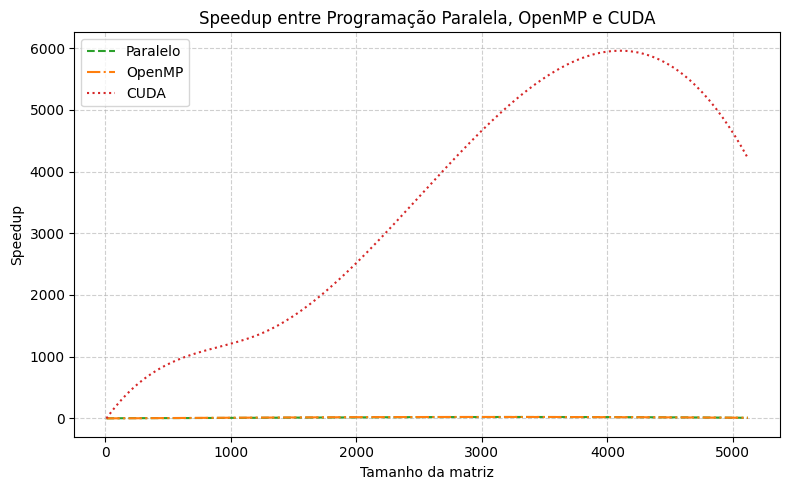

In [18]:
# Speedup

x1 = df_paralelo['Tamanho da matriz']
y1_speedup_paralelo = df_sequencia[' Tempo (milisegundos)'] / df_paralelo[' Tempo (milisegundos)']
x2 = df_openmp['Tamanho da matriz']
y2_speedup_openmp = df_sequencia[' Tempo (milisegundos)'] / df_openmp[' Tempo (milisegundos)']
x3 = df_paralelo_cuda['Tamanho da matriz']
y3_speedup_cuda = df_sequencia[' Tempo (milisegundos)'] / df_paralelo_cuda[' Tempo (milisegundos)']

y1_speedup_paralelo.replace([np.inf, -np.inf], np.nan, inplace=True)
y2_speedup_openmp.replace([np.inf, -np.inf], np.nan, inplace=True)
y3_speedup_cuda.replace([np.inf, -np.inf], np.nan, inplace=True)

mask1 = ~np.isnan(y1_speedup_paralelo)
x1_clean = x1[mask1]
y1_clean = y1_speedup_paralelo[mask1]
mask2 = ~np.isnan(y2_speedup_openmp)
x2_clean = x2[mask2]
y2_clean = y2_speedup_openmp[mask2]
mask3 = ~np.isnan(y3_speedup_cuda)
x3_clean = x3[mask3]
y3_clean = y3_speedup_cuda[mask3]

x_new = np.linspace(min(x1.min(), x2.min(), x3.min()), max(x1.max(), x2.max(), x3.max()), 200)
y1_smooth = make_interp_spline(x1_clean, y1_clean)(x_new)
y2_smooth = make_interp_spline(x2_clean, y2_clean)(x_new)
y3_smooth = make_interp_spline(x3_clean, y3_clean)(x_new)

plt.figure(figsize=(8,5))
plt.plot(x_new, y1_smooth, label='Paralelo', color='tab:green', linestyle='--')
plt.plot(x_new, y2_smooth, label='OpenMP', color='tab:orange', linestyle='-.')
plt.plot(x_new, y3_smooth, label='CUDA', color='tab:red', linestyle=':')

plt.title('Speedup entre Programação Paralela, OpenMP e CUDA')
plt.xlabel('Tamanho da matriz')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()